In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv('Automobile price data _Raw_.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data.replace('?', np.nan ,inplace = True)

In [5]:
data.describe(include ='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,9279
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [6]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
data = data.drop('normalized-losses',axis=1)

In [8]:
data = data.dropna(subset = ['price'],axis=0)

In [9]:
data['num-of-doors'].replace(np.nan,'four',inplace =True)

In [10]:
str_to_num = {"four": 4, "six": 6, "five": 5, "eight": 8,"two": 2, "twelve": 12, "three":3 }
data.replace(str_to_num,inplace = True)

In [11]:
data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<AxesSubplot:xlabel='price'>

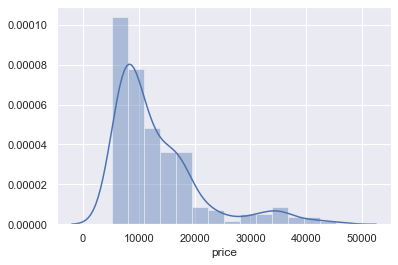

In [12]:
sns.distplot(data['price'])

In [13]:
data['price'] = data['price'].astype(int)

In [14]:
q = data['price'].quantile(0.90)
data_1 = data[data['price']<q]

<AxesSubplot:xlabel='price'>

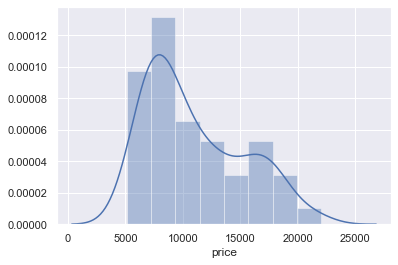

In [15]:
sns.distplot(data_1['price'])

In [16]:
data_1.describe(include ='all')

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,180.000000,180,180,180,180.000000,180,180,180,180.000000,180.000000,...,180.000000,180,176,176,180.000000,178,178,180.000000,180.000000,180.000000
unique,NaN,20,2,2,NaN,5,3,1,NaN,NaN,...,NaN,8,34,32,NaN,49,19,NaN,NaN,NaN
top,NaN,toyota,gas,std,NaN,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,NaN
freq,NaN,32,165,151,NaN,80,117,180,NaN,NaN,...,NaN,76,20,17,NaN,19,35,NaN,NaN,NaN
mean,0.888889,NaN,NaN,NaN,3.133333,NaN,NaN,NaN,97.943333,172.308889,...,116.988889,NaN,NaN,NaN,9.969000,NaN,NaN,26.055556,31.716667,10975.461111
std,1.227656,NaN,NaN,NaN,0.993836,NaN,NaN,NaN,5.045559,11.028851,...,25.696116,NaN,NaN,NaN,3.718489,NaN,NaN,6.115026,6.342439,4253.337164
min,-2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,16.000000,22.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.500000,166.300000,...,97.000000,NaN,NaN,NaN,8.675000,NaN,NaN,21.000000,27.000000,7607.500000
50%,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,96.500000,172.400000,...,110.000000,NaN,NaN,NaN,9.000000,NaN,NaN,25.500000,31.000000,9594.000000
75%,2.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,100.400000,177.800000,...,134.000000,NaN,NaN,NaN,9.400000,NaN,NaN,31.000000,37.000000,13882.500000


<AxesSubplot:xlabel='engine-size'>

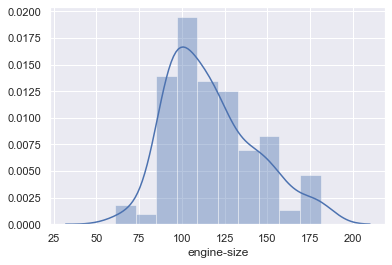

In [17]:
sns.distplot(data_1['engine-size'])

In [18]:
data_1.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [19]:
columns = ['bore','stroke','horsepower','peak-rpm']
col_float =['bore','stroke']
col_int = ['horsepower','peak-rpm']
data_1[columns] = data_1[columns].fillna(0)
data_1[col_int] = data_1[col_int].astype(int)
data_1[col_float] = data_1[col_float].astype(float)

C:\Users\Vaibhav\anaconda3\envs\WiproDemo\lib\site-packages\pandas\core\frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
data_1.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [21]:
data_2=data_1.reset_index(drop=True)

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0,strategy = 'mean')
imputer.fit(data_2[columns])
data_2[columns] = imputer.transform(data_2[columns])

In [23]:
data_2.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [24]:
data_2.describe(include='all')

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,180.000000,180,180,180,180.000000,180,180,180,180.000000,180.000000,...,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,NaN,20,2,2,NaN,5,3,1,NaN,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,std,NaN,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,165,151,NaN,80,117,180,NaN,NaN,...,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.888889,NaN,NaN,NaN,3.133333,NaN,NaN,NaN,97.943333,172.308889,...,116.988889,NaN,3.302273,3.244545,9.969000,96.314607,5135.674157,26.055556,31.716667,10975.461111
std,1.227656,NaN,NaN,NaN,0.993836,NaN,NaN,NaN,5.045559,11.028851,...,25.696116,NaN,0.260915,0.307178,3.718489,30.106921,465.760441,6.115026,6.342439,4253.337164
min,-2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,22.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.500000,166.300000,...,97.000000,NaN,3.150000,3.117500,8.675000,70.000000,4800.000000,21.000000,27.000000,7607.500000
50%,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,96.500000,172.400000,...,110.000000,NaN,3.270000,3.280000,9.000000,92.000000,5200.000000,25.500000,31.000000,9594.000000
75%,2.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,100.400000,177.800000,...,134.000000,NaN,3.540000,3.410000,9.400000,112.000000,5500.000000,31.000000,37.000000,13882.500000


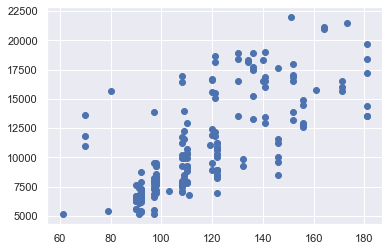

In [25]:
plt.scatter(data_2['engine-size'],data_2['price'])

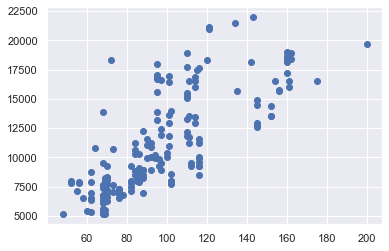

In [26]:
plt.scatter(data_2['horsepower'],data_2['price'])

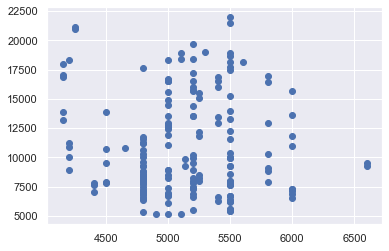

In [27]:
plt.scatter(data_2['peak-rpm'],data_2['price'])

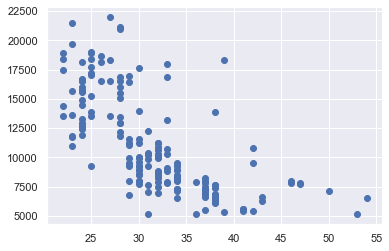

In [28]:
plt.scatter(data_2['highway-mpg'],data_2['price'])

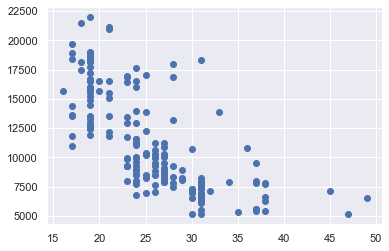

In [29]:
plt.scatter(data_2['city-mpg'],data_2['price'])

In [30]:
log_price = np.log(data_2['price'])
data_2['log_price'] = log_price
data_2

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log_price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,9.510075
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,9.711116
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,9.711116
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.543235
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-2,volvo,gas,turbo,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420,9.821192
176,-1,volvo,gas,turbo,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950,9.849559
177,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845,9.731809
178,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045,9.854560


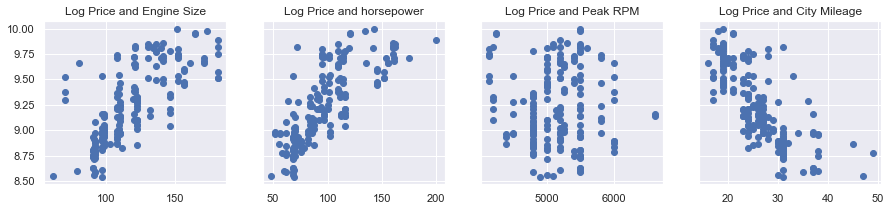

In [31]:
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_2['engine-size'],data_2['log_price'])
ax1.set_title('Log Price and Engine Size')
ax2.scatter(data_2['horsepower'],data_2['log_price'])
ax2.set_title('Log Price and horsepower')
ax3.scatter(data_2['peak-rpm'],data_2['log_price'])
ax3.set_title('Log Price and Peak RPM')
ax4.scatter(data_2['city-mpg'],data_2['log_price'])
ax4.set_title('Log Price and City Mileage')


plt.show()

In [32]:
data_2.columns.values

array(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'log_price'], dtype=object)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_2[['length','engine-size','horsepower','peak-rpm', 'city-mpg','highway-mpg']]

vif = pd.DataFrame() 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

C:\Users\Vaibhav\AppData\Roaming\Python\Python36\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [34]:
vif

,VIF,Features
0,205.721750,length
1,96.171330,engine-size
2,63.368774,horsepower
3,133.975272,peak-rpm
4,386.951713,city-mpg
5,478.752490,highway-mpg


In [35]:
data_2 = data_2.drop(['length','height','width','engine-location'],axis=1)

<AxesSubplot:>

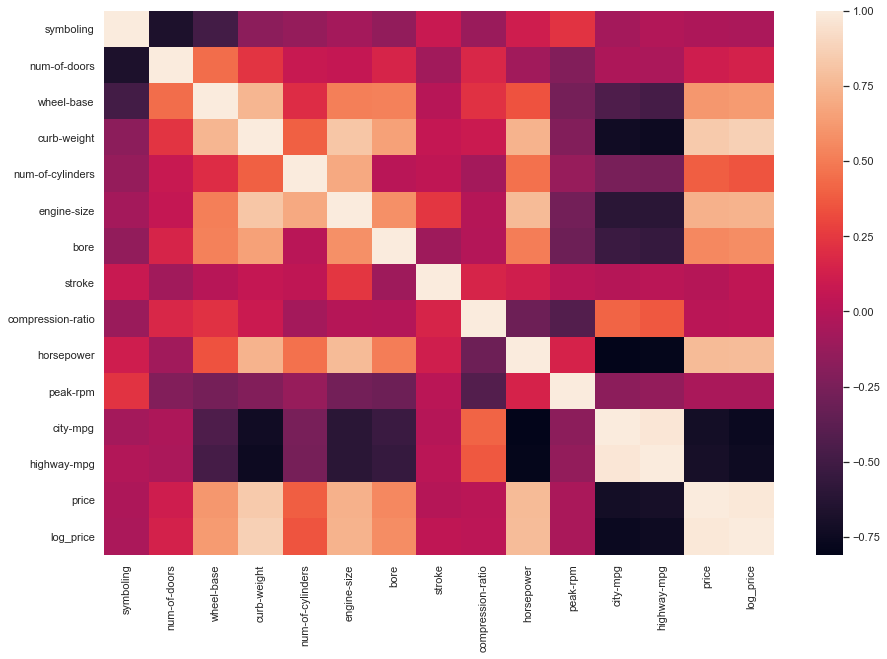

In [36]:
fig, ax6 = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_2.corr(),ax=ax6)

In [37]:
data_with_dummies = pd.get_dummies(data_2, drop_first=True)

In [38]:
data_with_dummies.head()

,symboling,num-of-doors,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2,88.6,2548,4,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,2548,4,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,2823,6,152,2.68,3.47,9.0,154.0,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,2337,4,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,2824,5,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
data_3 = data_with_dummies.drop('log_price',axis=1)

In [40]:
Y = data_3['price'].values.reshape(-1,1)
X = data_3.drop('price',axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X[columns[:]] = sc_X.fit_transform(X[columns[:]])
Y = sc_Y.fit_transform(Y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

C:\Users\Vaibhav\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train, Y_train)

C:\Users\Vaibhav\anaconda3\envs\WiproDemo\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
Y_pred = regressor.predict(X_test)
Y_pred1 = regressor1.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score 
print("SVM")
print('MSE: ',mean_squared_error(Y_test,Y_pred)) 
print('R2 score',r2_score(Y_test,Y_pred))

SVM
MSE:  0.40436119421721217
R2 score 0.6637618434338821


In [47]:

print("Random Forest")
print('MSE: ',mean_squared_error(Y_test,Y_pred1))
print('R2 soce',r2_score(Y_test,Y_pred1))


Random Forest
MSE:  0.2071790437285957
R2 soce 0.827724567197183
